# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


Elaborado por: Julian Enrique Espinoza Valenzuela | A01254679

# Importing libraries

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Semana_tec_1/TC1002S/NotebooksProfessor/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [ ]:
# Dataset url
url = Ruta + "datasets/iris/iris.csv"

# Load the dataset
colnames = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Class"]

# Load the dataset
dataset = pd.read_csv(url, header = None, names = colnames)

df= pd.DataFrame(dataset)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print the dataframe
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# get the number of observations and variables
df.shape


(150, 5)

2. Drop rows with any missing values


In [ ]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 5)


3. Scatterplot




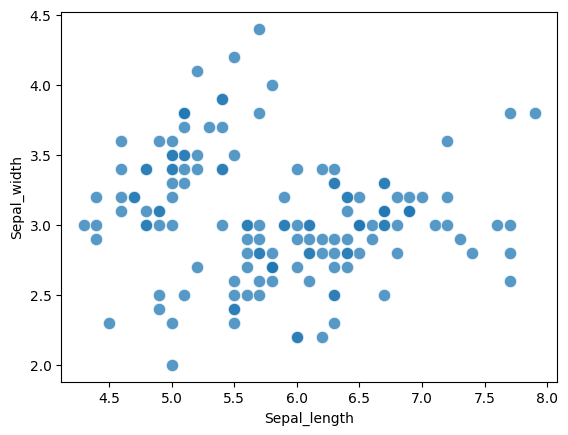

In [ ]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="Sepal_length", y="Sepal_width", s=80, alpha=0.75)
plt.show()

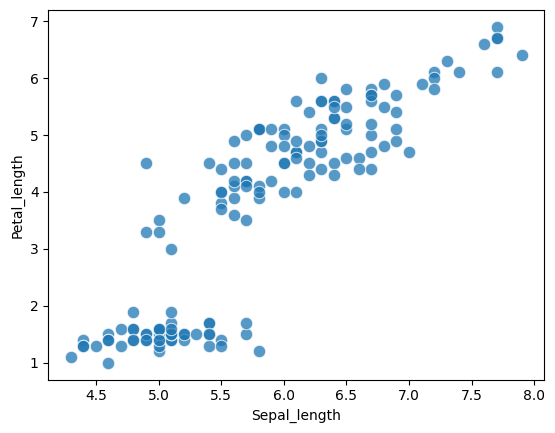

In [ ]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="Sepal_length", y="Petal_length", s=80, alpha=0.75)
plt.show()

In [ ]:
#Filtramos la tabla de flores para remover los valores strings y poder closterizar de manera correcta.
petal_info_and_typeflower = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
filtered_df = df[petal_info_and_typeflower]
print(filtered_df)

     Sepal_length  Sepal_width  Petal_length  Petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Difficult to plot independetly all combinations, let's use pairplot

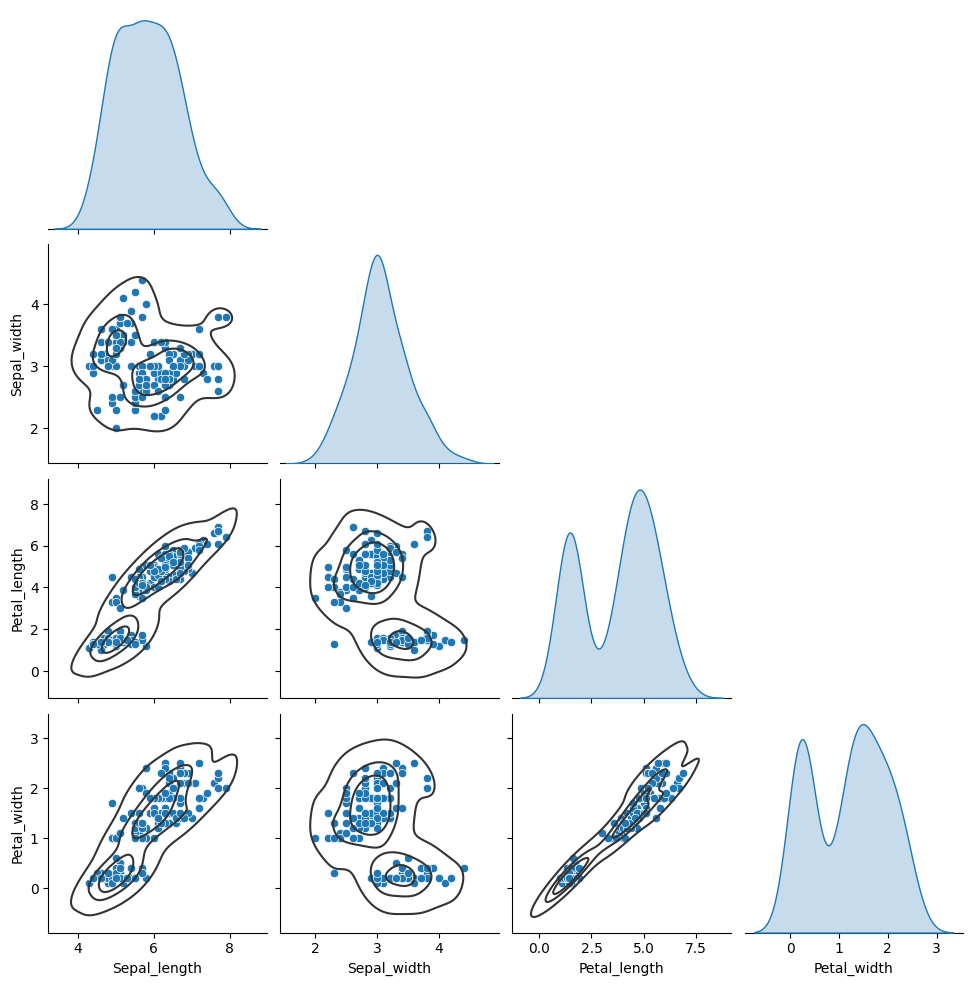

In [ ]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(filtered_df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
yestimated = km.fit_predict(filtered_df)
#yestimated = km.fit_predict(df[['x1','x2']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
# Add a new column to the dataset with the cluster information
filtered_df['yestimated'] = yestimated

filtered_df

<ipython-input-24-ea20b99ee593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['yestimated'] = yestimated


,Sepal_length,Sepal_width,Petal_length,Petal_width,yestimated
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [ ]:
# Print the Labels/Names of the existing clusters
filtered_df.yestimated.unique()

array([0, 1, 2], dtype=int32)

In [ ]:
# Cluster centroides
km.cluster_centers_


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
# Sum of squared error (sse) of the final model
km.inertia_

78.85566582597731

In [ ]:
# The number of iterations required to converge
km.n_iter_

9

# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster

In [ ]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

(50, 5)
50
Number of points in clusters 0: 50
Number of points in clusters 1: 39
Number of points in clusters 02: 61
Total Number of points in the clusters: 150


# Plot estimated clusters

Plot estimated clusters

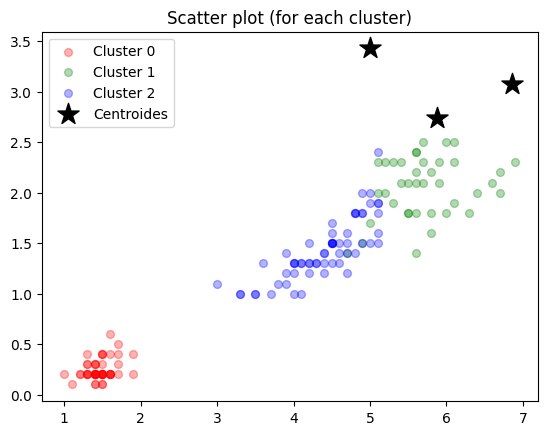

In [ ]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Petal_length, df1.Petal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_length, df2.Petal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_length, df3.Petal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
#plt.xlabel('Petal_length')
#plt.ylabel('Petal_width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [69]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x2']])
    # Save sse for each k
    sse.append(km.inertia_)


KeyError: "None of [Index(['x1', 'x2'], dtype='object')] are in the [columns]"

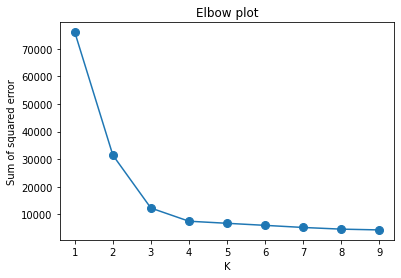

In [ ]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity:

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

#**CLASS_ACTIVITY**

In [ ]:
#1. Do clustering with the iris flower dataset to form clusters using as features the four features

Indeed, we could calculate the clustering of more than 2 variables or features, but the fact that we can plot more than two variables with the scatter function is not possible due to its nature. However, what we could do is plot in three dimensions with some other function. Nevertheless, we would not satisfy what is asked in the instruction of this question.

Finally, and referring to what was requested, as I mentioned before, although we could do a clustering of 4 variables, the fact that we can see it in a graph is not possible due to our human nature.

What was done to comply with this question was to correctly carry out what was required in sections 2 and 3 of this same activity.

The results are attached in the following sections.

In [108]:
#2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features
df_p= pd.DataFrame(dataset)
df_p
df_p.dropna()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [109]:
petal_info_and_typeflower = ['Sepal_length', 'Sepal_width','Petal_length', 'Petal_width']
filtered_df = df_p[petal_info_and_typeflower]
print(filtered_df)

     Sepal_length  Sepal_width  Petal_length  Petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [110]:
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#yestimated = km.fit_predict(filtered_df)
yestimated = km.fit_predict(df_p[['Petal_length','Petal_width']] )
#yestimated = km.fit_predict(df[['Sepal_length','Sepal_width']] )

# Print estimated cluster of each point in the dataset
yestimated


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [111]:
filtered_df['yestimated'] = yestimated

filtered_df

<ipython-input-111-3129209a3b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['yestimated'] = yestimated


,Sepal_length,Sepal_width,Petal_length,Petal_width,yestimated
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [112]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 52
Number of points in clusters 1: 48
Number of points in clusters 02: 50
Total Number of points in the clusters: 150


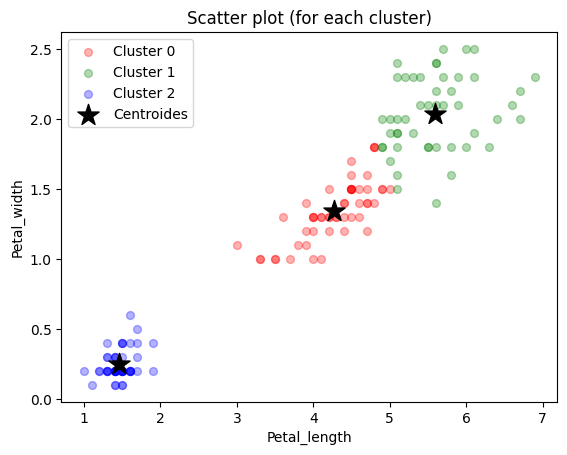

In [113]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Petal_length, df1.Petal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_length, df2.Petal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_length, df3.Petal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.legend()
plt.show()

In [114]:
#3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features
df_s= pd.DataFrame(dataset)
df_s
df_s.dropna()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class,yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [115]:

petal_info_and_typeflower = ['Sepal_length', 'Sepal_width','Petal_length', 'Petal_width']
filtered_df = df_s[petal_info_and_typeflower]
print(filtered_df)

     Sepal_length  Sepal_width  Petal_length  Petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [116]:
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#yestimated = km.fit_predict(filtered_df)
#yestimated = km.fit_predict(df_p[['Petal_length','Petal_width']] )
yestimated = km.fit_predict(df[['Sepal_length','Sepal_width']] )

# Print estimated cluster of each point in the dataset
yestimated


filtered_df['yestimated'] = yestimated

filtered_df

<ipython-input-116-5c8ed7845b4d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['yestimated'] = yestimated


,Sepal_length,Sepal_width,Petal_length,Petal_width,yestimated
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [118]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )


Number of points in clusters 0: 53
Number of points in clusters 1: 51
Number of points in clusters 02: 46
Total Number of points in the clusters: 150


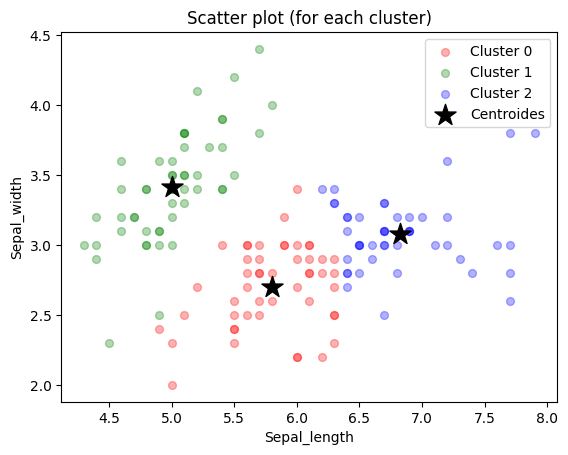

In [119]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.Sepal_length, df1.Sepal_width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Sepal_length, df2.Sepal_width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Sepal_length, df3.Sepal_width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend()
plt.show()

In [ ]:
#4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

In [133]:
#Petal K-mean elbow plot.
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(filtered_df[['Petal_length','Petal_width']])
    # Save sse for each k
    sse.append(km.inertia_)

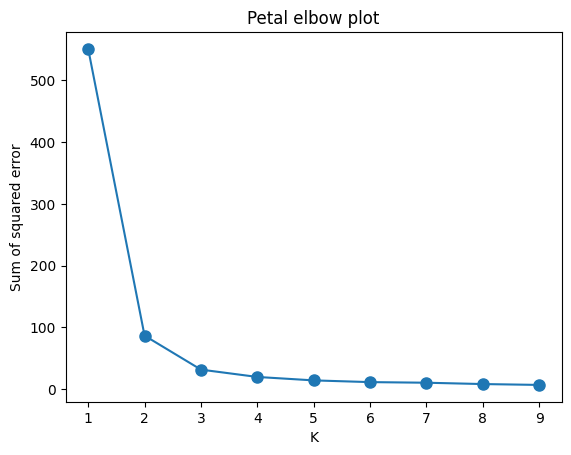

In [134]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Petal elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [135]:
#Sepal K-mean elbow plot.
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(filtered_df[['Sepal_length','Sepal_width']])
    # Save sse for each k
    sse.append(km.inertia_)

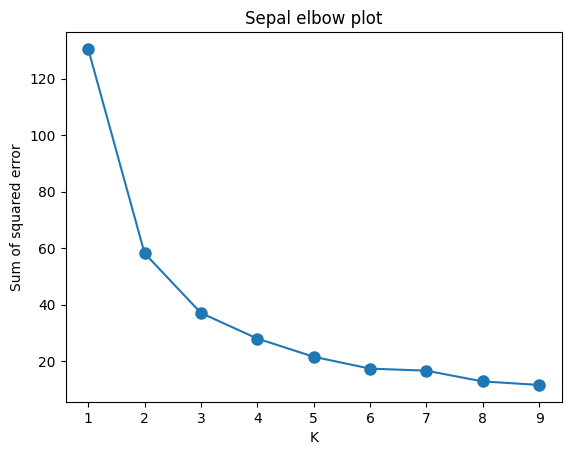

In [136]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Sepal elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Based on the analysis from the elbow plot graphs, we can see that for k (clusters) = 2, the K-means algorithm groups the data better with the data that only contains Sepal records (Sepal_length and Sepal_width). This can be evidenced by looking at the elbow plot graphs where the sum of the squared error when we take a k = 2 in both K-means calculations is smaller when the algorithm is used with sepal data. When we select this value of k, we observe that the sum of squared errors for the petal data is approximately 100, whereas for the sepal data, it is closer to 60. This indicates that, for this particular value of k, the sepal data yields a more effective grouping.


# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
